## Bar chart


In [58]:
%run ./prepare_data.ipynb
import matplotlib.pyplot as plt


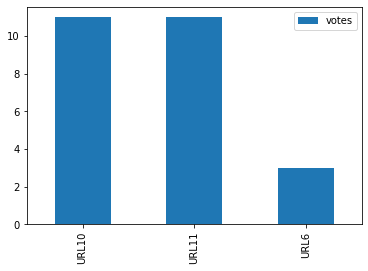

In [59]:
votes_links.plot.bar(y='votes'); # plot histogram


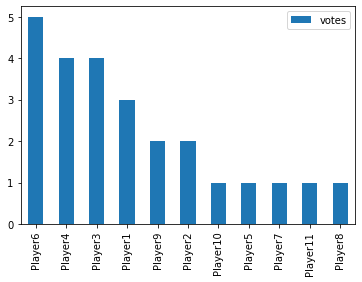

In [60]:
total_votes.plot.bar(y='votes'); # plot histogram

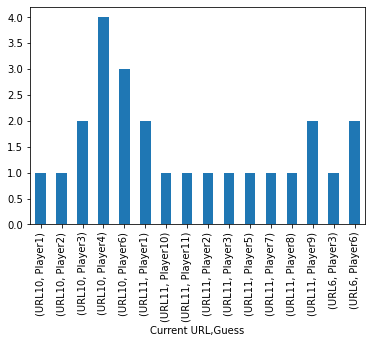

In [61]:
if len(df_raw) < 30:
    guess_stats.plot.bar(x='Current URL'); # plot histogram


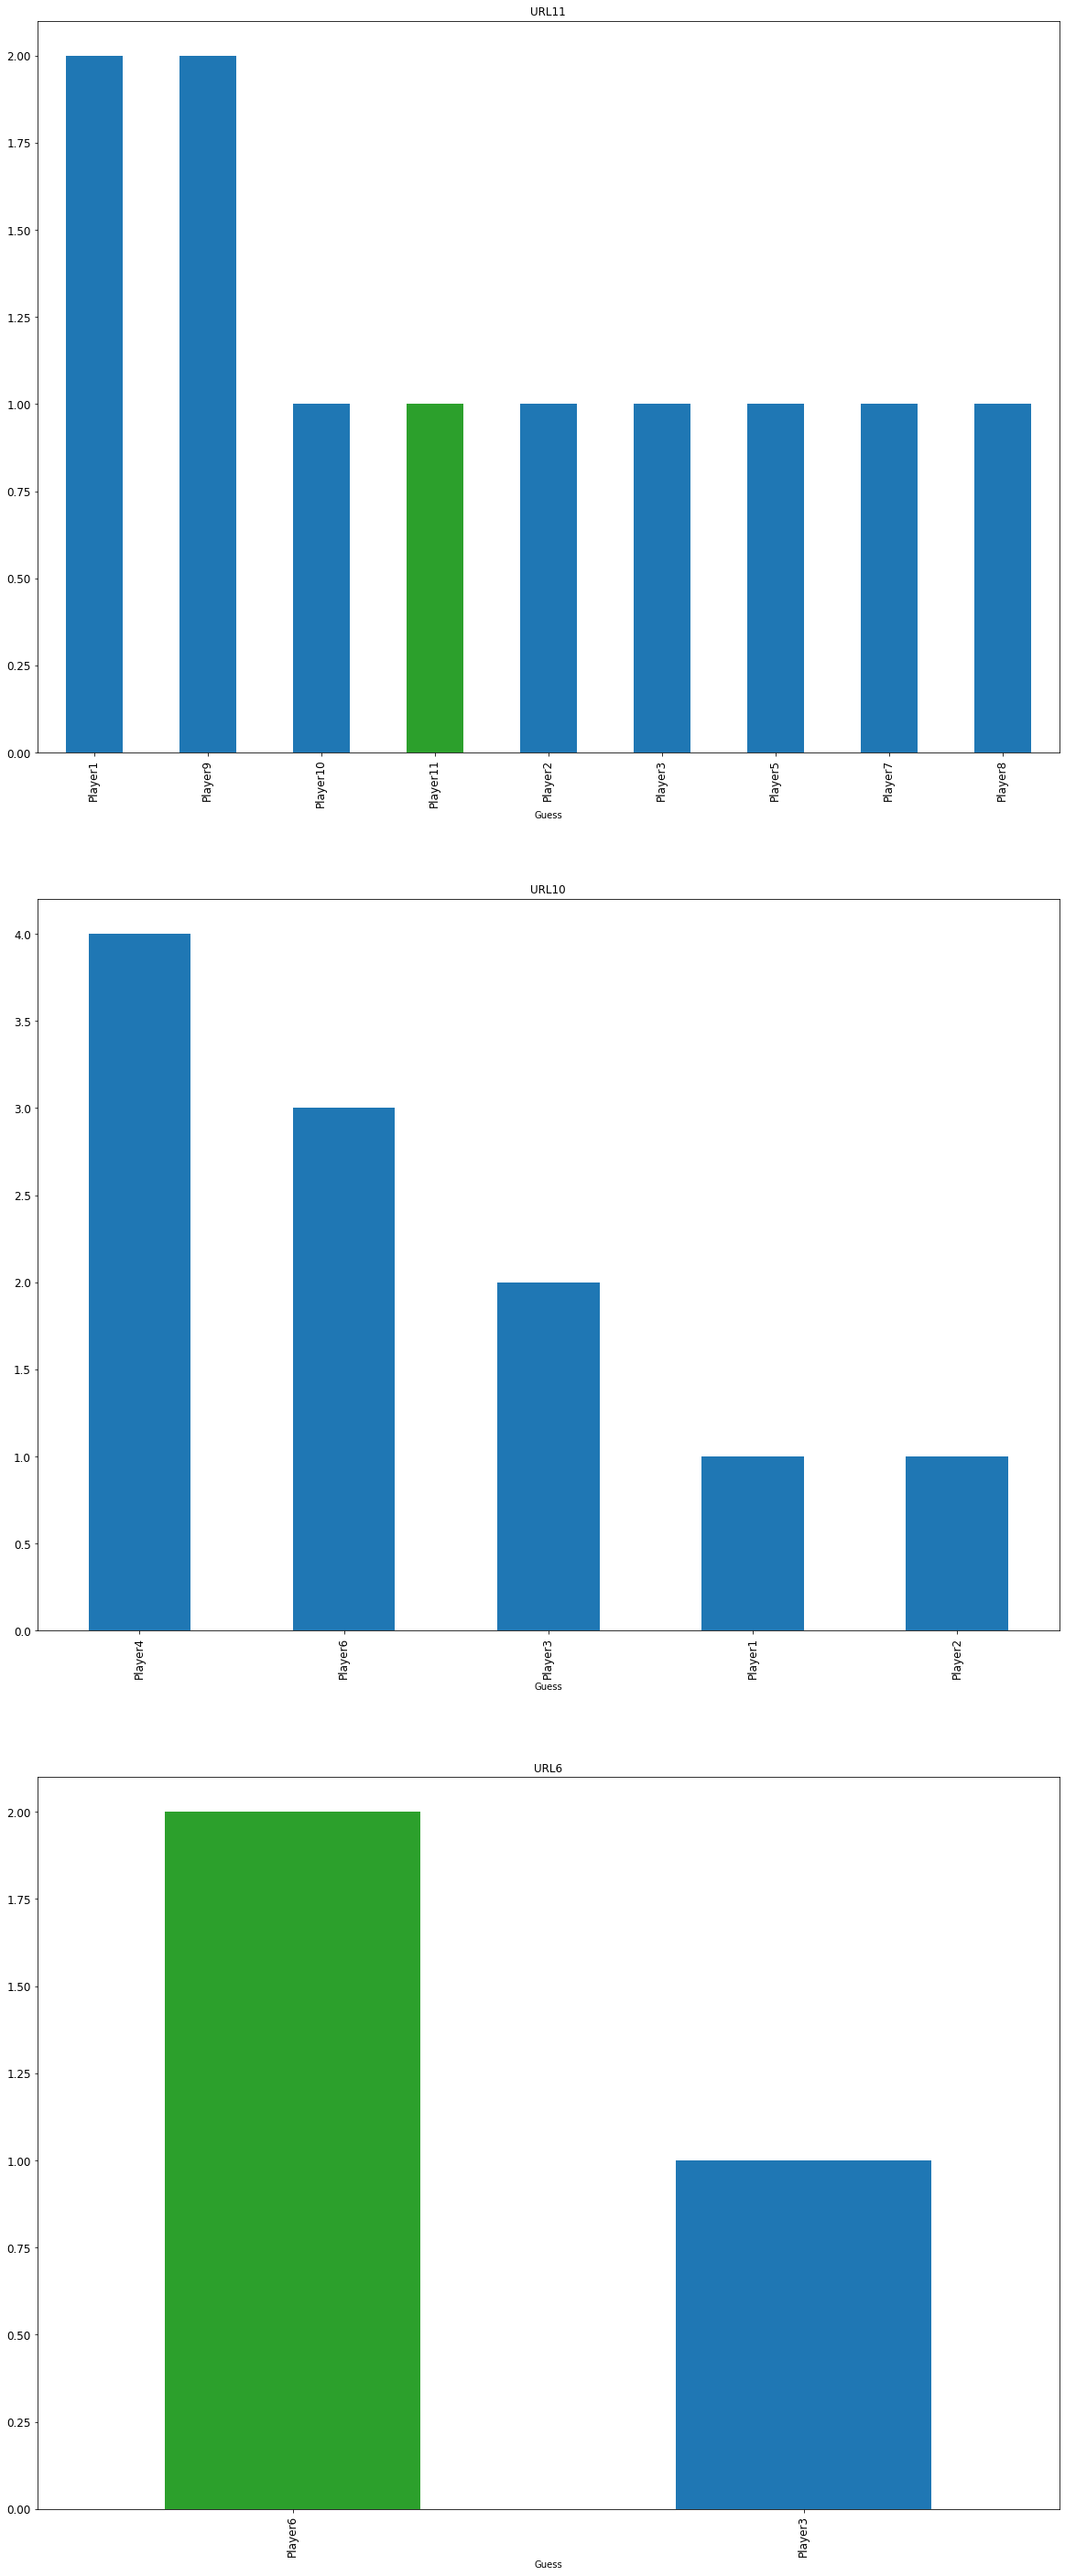

In [62]:
# bar chart per URL, the correct answer is colored in green, the rest of the guesses are blue

fig, axes = plt.subplots(len(urls),1,figsize=(20, 50)) #ncols=len(urls)#,)
for i,ax in enumerate(axes):
    url = urls[i]
    temp_df = df_guess.loc[df_guess['Current URL'] == url]
    labels = temp_df['Guess']
    cor_ans = df2_raw[df2_raw['URL'] == url]['Player'].values[0]
    ind=labels.isin([cor_ans])
    color=list(map(lambda x: 'C2' if x else 'C0', ind))
    width = len(ind) * [0.2]
    temp_df.loc[:,['Guess','votes']].plot.bar(ax=ax,subplots=True, x='Guess',y='votes',color=color, fontsize=12);
    ax.get_legend().remove()
    ax.set_title(url,fontdict={'fontsize':12})
plt.show()


## Pie chart

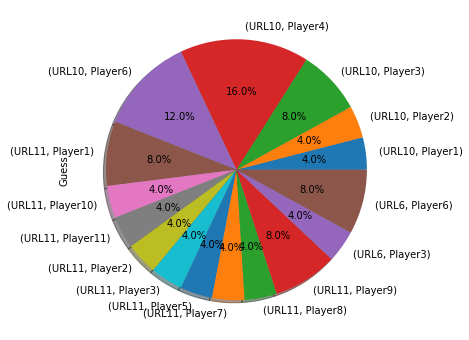

In [63]:
# combined pie chart, only for small dataframes
if len(df_raw) < 30:
    guess_stats.plot.pie(subplots=True,y='votes',figsize=(6, 6),autopct='%1.1f%%',shadow = True);



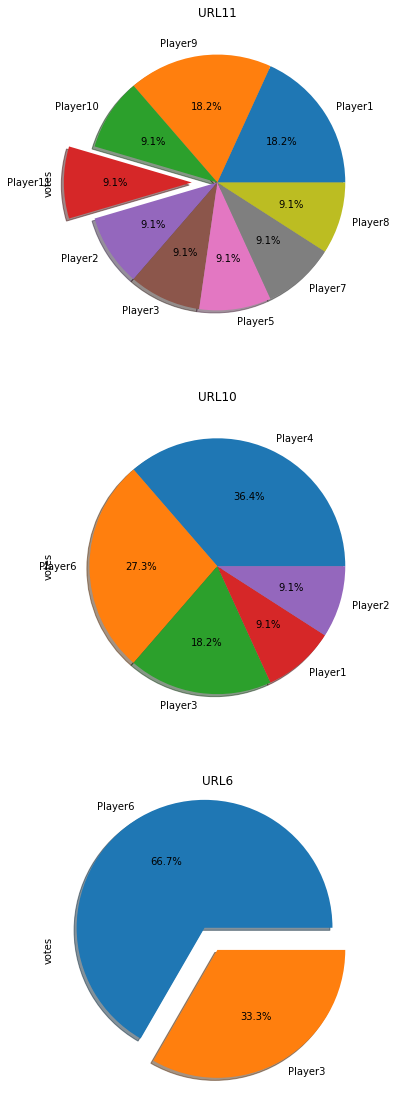

In [64]:
# pie chart per URL, the correct answers are "exploded"

fig, axes = plt.subplots(len(urls),1,figsize=(30, 20))
for i,ax in enumerate(axes):
    url = urls[i]
    temp_df = df_guess.loc[df_guess['Current URL'] == url]
    labels = temp_df['Guess']
    cor_ans = df2_raw[df2_raw['URL'] == url]['Player'].values[0]
    ind=labels.isin([cor_ans])
    #explode=list(map(int, ind))
    explode=list(map(lambda x: 0.2 if x else 0, ind)) #only explode correct guess
    temp_df.loc[:,['Guess','votes']].plot.pie(ax=ax,subplots=True,labels = labels, y='votes', autopct='%1.1f%%',shadow = True,explode=explode);
    ax.get_legend().remove()
    ax.set_title(url)
plt.show()
